In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import xlrd


Welcome to JupyROOT 6.20/04


In [2]:
def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array(),
              file["Delphes;1"]["Event.CrossSection"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 

In [3]:
me = 0.000511
mu = 0.10566


################################################
def prlen(events):
    print(len(events))

################################################  sel
def num_sl(event,lab,num):
    where1 = np.where(event[:,lab]==num)
    return event[where1]

def l_sl(event):
    where1 = np.where(event[:,0]+event[:,4]==1)
    return event[where1]

def j_sl(event):
    where1 = np.where(event[:,18]>0)
    return(event[where1])  

def Ehover(event):
    where=[]
    for i in range(len(event)):
        if np.min(event[i][19])<0.2:
            where.append(i)
    return event[where]  
       
################################################  maa caculate
def m_aa(events, m):
    where1=[]   
    for i in range(len(events)):
        p = [0,0,0,0] 
        for j in range(events[i][8]):
            pt = events[i][9][j]   
            eta = events[i][10][j]  
            phi = events[i][11][j]    
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
            p[3] = p[3] + pt*np.sinh(eta)   ### pz
            p[0] = p[0] + np.sqrt( (pt*np.cos(phi))**2 + (pt*np.sin(phi))**2 + (pt*np.sinh(eta))**2 )     
        maa = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(maa)
        pTaa = np.sqrt(p[1]**2 + p[2]**2)
    return 
################################################  
def j_mass(events,j_mass):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            jet_m = events[i][20][where1[0][j]]
            j_mass.append(jet_m)
            where.append(i)  
    c = np.unique(where)
    return events[c]

In [4]:
m_axlist = [100,80,65,50,40,30]


bg_file = uproot.open("/data/event/final/bg_ppaalvll/Events/run_01/tag_1_delphes_events.root")
bg_events = file_np(bg_file)

bgsl_2a = num_sl(bg_events,8,2)
bgsl_2a_1l = l_sl(bgsl_2a)
####################### drow picture use
maa_bgsl_2a_1l=[]
pt_bgsl_2a_1l=[]
################################## maa sl result (drow pic)
bgsl_2a_1l_msl = m_aa(bgsl_2a_1l,maa_bgsl_2a_1l) 




sg_events = {}
maa = {}


for m_ax in m_axlist:
    sg_file_path = f"/data/event/final/sg_{m_ax}ppwax/Events/run_01/tag_1_delphes_events.root"
    sg_file = uproot.open(sg_file_path)
    maa[m_ax] = []
    sg_events[m_ax] = l_sl(num_sl(file_np(sg_file),8,2))
    m_aa(sg_events[m_ax] ,maa[m_ax])
    


<Figure size 640x480 with 0 Axes>

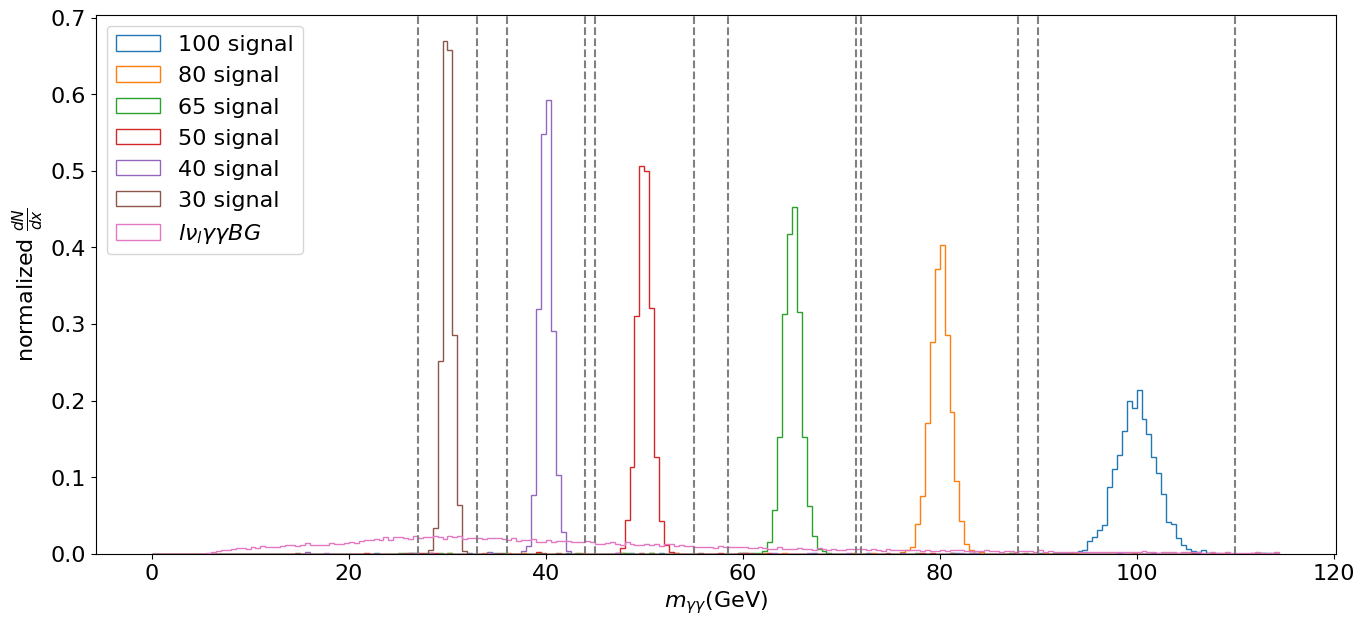

In [5]:
plt.figure(1)

bins = np.arange(0, 115, 0.5)
plt.figure(figsize=(16, 7))
for m_ax in m_axlist:
    plt.hist(maa[m_ax], bins=bins, label=f"{m_ax} signal", histtype='step',density='ture')
    plt.axvline(m_ax+m_ax*0.1, color='gray', linestyle='--')
    plt.axvline(m_ax-m_ax*0.1, color='gray', linestyle='--')
plt.hist(maa_bgsl_2a_1l, bins=bins, label=r"$l\nu_{l}\gamma \gamma BG$", histtype='step',density='ture')

plt.xlabel(r"$m_{\gamma \gamma}$(GeV)", fontsize=16)
plt.ylabel(r"normalized $\frac{dN}{dx}$", fontsize=16)

plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=16)

# plt.tight_layout()  
plt.show()  


In [6]:
small_m_axlist = [25,20,10,5,1]


bg_file = uproot.open("/data/event/final/bg_ppaalvll/Events/run_01/tag_1_delphes_events.root")
bg_events = file_np(bg_file)

bg_jet_file = uproot.open("/data/event/final/bgjet_pplvllj/Events/run_01/tag_1_delphes_events.root")
j_events = file_np(bg_jet_file)



bgsl_1j = j_sl(bg_events)
bgsl_1j_Eho = Ehover(bgsl_1j)
bgsl_1j_Eho_1l = l_sl(bgsl_1j_Eho)

jsl_1j = j_sl(j_events)
jsl_1j_Eho = Ehover(jsl_1j)
jsl_1j_Eho_1l = l_sl(jsl_1j_Eho)
####################### drow picture use

bg_jmass = []
j_jmass = []

bgpic=j_mass(bgsl_1j_Eho_1l,bg_jmass)
jpic=j_mass(jsl_1j_Eho_1l,j_jmass)


small_sg_events = {}
sg_jmass = {}


for m_ax in small_m_axlist:
    sg_file_path = f"/data/event/final/sg_{m_ax}ppwax/Events/run_01/tag_1_delphes_events.root"
    sg_file = uproot.open(sg_file_path)
    sg_jmass[m_ax] = []
    small_sg_events[m_ax] = l_sl(Ehover(j_sl(file_np(sg_file))))
    j_mass(small_sg_events[m_ax] ,sg_jmass[m_ax])
    


<Figure size 640x480 with 0 Axes>

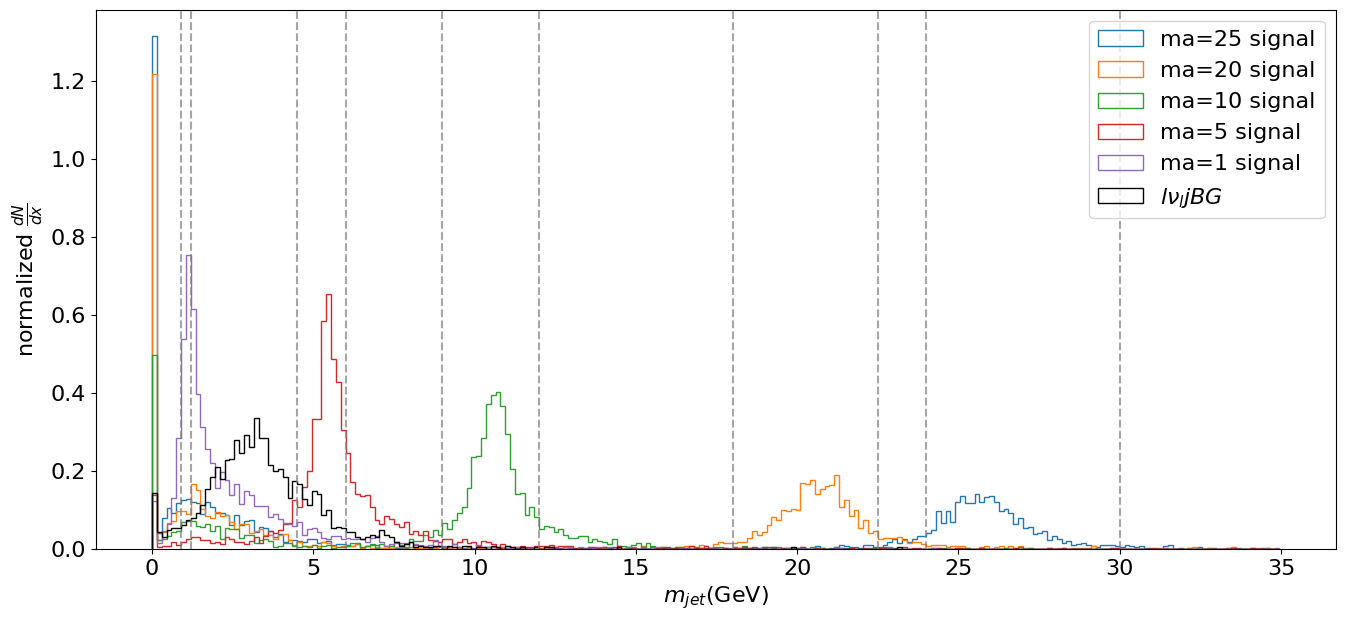

In [7]:
plt.figure(1)

bins = np.arange(0, 35, 0.15)
plt.figure(figsize=(16, 7))
for m_ax in small_m_axlist:
    line1 = plt.axvline(m_ax+m_ax*0.2, color='gray', linestyle='--', alpha=0.7)
    line2 = plt.axvline(m_ax-m_ax*0.1, color='gray', linestyle='--', alpha=0.7)
    plt.hist(sg_jmass[m_ax], bins=bins, label=f"ma={m_ax} signal", histtype='step',density='ture')

#     line1.set_dashes([10, 3, 10, 3])
#     line2.set_dashes([10, 3, 10, 3])

plt.hist(j_jmass, bins=bins, label=r"$l\nu_{l}j BG$", histtype='step',density='ture',edgecolor='k')
# plt.hist(bg_jmass, bins=bins, label="background", histtype='step',density='ture')

plt.xlabel(r"$m_{jet}$(GeV)", fontsize=16)
plt.ylabel(r"normalized $\frac{dN}{dx}$", fontsize=16)
# plt.title('Combined maa for All m_ax Values')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  
plt.show()  


<Figure size 640x480 with 0 Axes>

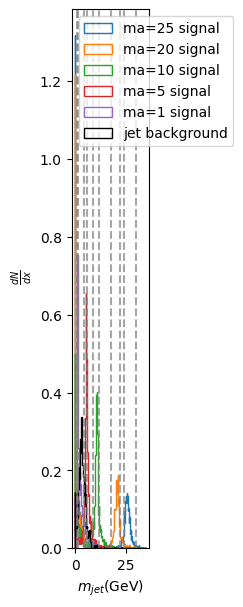

In [8]:
plt.figure(1)

bins = np.arange(0, 35, 0.15)
plt.figure(figsize=(1, 7))
for m_ax in small_m_axlist:
    line1 = plt.axvline(m_ax+m_ax*0.2, color='gray', linestyle='--', alpha=0.7)
    line2 = plt.axvline(m_ax-m_ax*0.1, color='gray', linestyle='--', alpha=0.7)
    plt.hist(sg_jmass[m_ax], bins=bins, label=f"ma={m_ax} signal", histtype='step',density='ture')

#     line1.set_dashes([10, 3, 10, 3])
#     line2.set_dashes([10, 3, 10, 3])
# plt.hist(bg_jmass, bins=bins, label="background", histtype='step',density='ture',edgecolor='k')
plt.hist(j_jmass, bins=bins, label="jet background", histtype='step',density='ture',edgecolor='k')

plt.xlabel(r"$m_{jet}$(GeV)")
plt.ylabel(r" $\frac{dN}{dx}$")
# plt.title('Combined maa for All m_ax Values')
plt.legend()
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  
plt.show()  